<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-02_Machine_Learning/231229_01_Cats_vs_Dogs_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2023-12-29 00:19:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.207, 142.251.170.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.9MB/s    in 3.1s    

2023-12-29 00:19:12 (20.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train/cats
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/cats
/tmp/cats_and_dogs_filtered/validation/dogs


In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.525.jpg', 'cat.852.jpg', 'cat.181.jpg', 'cat.500.jpg', 'cat.398.jpg']
['dog.740.jpg', 'dog.602.jpg', 'dog.319.jpg', 'dog.938.jpg', 'dog.294.jpg']


In [ ]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


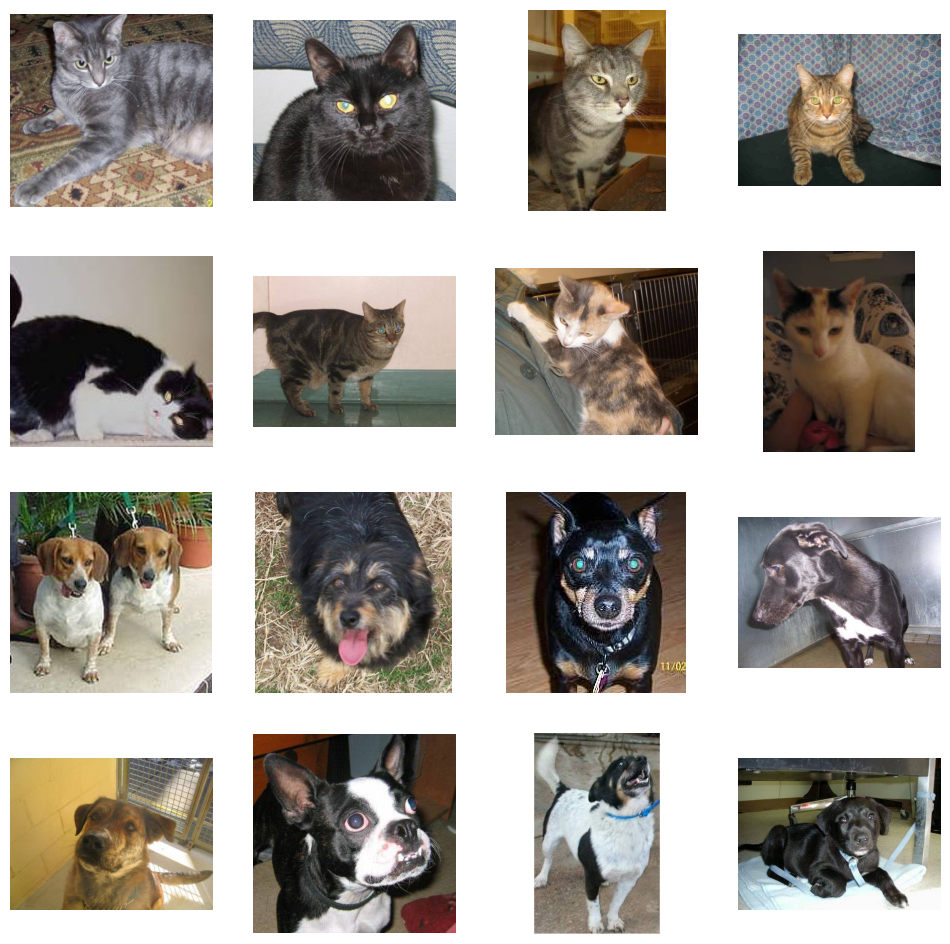

In [ ]:
# 시각화로 보기
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 이미지 데이터 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

# 5. 모델 훈련
model.fit(train_generator, validation_data=validation_generator, epochs=5)

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

In [ ]:
# # 모델 구성하기
# import tensorflow as tf


# model = tf.keras.models.Sequential([
#   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#   tf.keras.layers.MaxPooling2D(2,2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 64)       

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# VGG16 모델 불러오기 (이미 학습된 가중치를 사용)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# VGG16의 합성곱층을 동결
for layer in vgg16_model.layers:
    layer.trainable = False

# 새로운 모델 구성
model = Sequential([
    vgg16_model,
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()


In [ ]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
# 이미지 데이터 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 모델 피팅
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,    #훈련 배치 개수
                    epochs=25,     #훈련횟수
                    validation_steps=50,    #테스트 배치 개수
                    verbose=2)

Epoch 1/25
100/100 - 58s - loss: 0.7407 - accuracy: 0.5295 - val_loss: 0.6883 - val_accuracy: 0.6200 - 58s/epoch - 576ms/step
Epoch 2/25
100/100 - 55s - loss: 0.6744 - accuracy: 0.6075 - val_loss: 0.6540 - val_accuracy: 0.5450 - 55s/epoch - 553ms/step
Epoch 3/25
100/100 - 51s - loss: 0.6153 - accuracy: 0.6945 - val_loss: 0.5941 - val_accuracy: 0.6670 - 51s/epoch - 510ms/step
Epoch 4/25
100/100 - 55s - loss: 0.5572 - accuracy: 0.7150 - val_loss: 0.5723 - val_accuracy: 0.7140 - 55s/epoch - 555ms/step
Epoch 5/25
100/100 - 54s - loss: 0.4929 - accuracy: 0.7560 - val_loss: 0.5245 - val_accuracy: 0.7390 - 54s/epoch - 542ms/step
Epoch 6/25
100/100 - 55s - loss: 0.4272 - accuracy: 0.7925 - val_loss: 0.6156 - val_accuracy: 0.7120 - 55s/epoch - 554ms/step
Epoch 7/25
100/100 - 50s - loss: 0.3699 - accuracy: 0.8375 - val_loss: 0.7267 - val_accuracy: 0.6890 - 50s/epoch - 505ms/step
Epoch 8/25
100/100 - 54s - loss: 0.3042 - accuracy: 0.8785 - val_loss: 0.6026 - val_accuracy: 0.7470 - 54s/epoch - 541

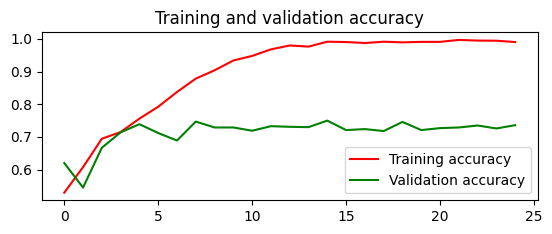

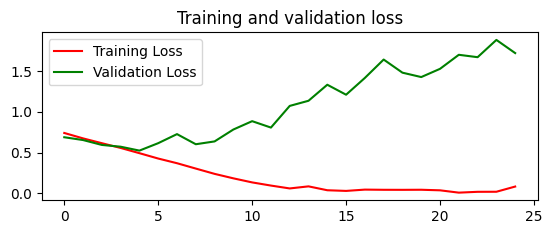

In [ ]:
# 정확도와 손실 확인
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.subplot(2,1,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.subplot(2,1,2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()